<a href="https://colab.research.google.com/github/GyuHyeong-Kim/Anomaly_Detection/blob/main/1_1_%ED%86%B5%EA%B3%84_%EA%B8%B0%EB%B0%98_(Z_SCORE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 28x28 크기의 이미지를 4개의 14x14 크기의 이미지로 분할해 진행
> MNIST 데이터세트 사용

> z-score 계산을 통해 유사도 판단

In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# MNIST 데이터

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST(root = './data', train = False, download = True, transform = transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.85MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# 28x28 크기의 이미지를 4개의 14x14 크기의 이미지로 분할하는 과정

def split_image(image):
    image = image.squeeze(0)
    return image.unfold(0, 14, 14).unfold(1, 14, 14).contiguous().view(4, 14, 14)

zero_images = [split_image(train_dataset[i][0]) for i in range(len(train_dataset)) if train_dataset[i][1] == 0]

In [ ]:
# 각 사분면의 이미지의 평균과 표준편차를 계산하는 과정

quadrant_stats = []
for quadrants in zip(*zero_images):
    means = [q.mean().item() for q in quadrants]
    stds = [q.std().item() for q in quadrants]
    quadrant_stats.append((means, stds))

In [ ]:
# 동일한 사분면에 있는 이미지의 평균과 표준편차를 수집
# 평균의 중앙값과 표준편차의 중앙값을 구하는 과정

quadrant_means = [np.median([stat[0][i] for stat in quadrant_stats]) for i in range(4)]
quadrant_stds = [np.median([stat[1][i] for stat in quadrant_stats]) for i in range(4)]

print(quadrant_means)
print(quadrant_stds)

[0.14888955280184746, 0.16833733767271042, 0.19774910062551498, 0.19281712919473648]
[0.31799449026584625, 0.3384728878736496, 0.36848337948322296, 0.3584730327129364]


In [ ]:
# 검증 데이터에서 무작위로 하나의 숫자 이미지를 선택하는 과정

random_index = random.randint(0, len(test_dataset) - 1)
selected_image, label = test_dataset[random_index]

# 선택한 숫자 이미지를 동일하게 4개의 14x14 크기의 이미지로 분할
selected_quadrants = split_image(selected_image)

In [ ]:
# 이상치 검출을 위한 z-score 계산 과정

def calculate_z_scores(selected_quadrants, quadrant_means, quadrant_stds):
    z_scores = []
    for i in range(4):
        mean = quadrant_means[i]
        std = quadrant_stds[i]
        z_score = (selected_quadrants[i].mean().item() - mean) / std
        z_scores.append(np.abs(z_score)) # 절대값으로 변환

    return z_scores

z_scores = calculate_z_scores(selected_quadrants, quadrant_means, quadrant_stds)

print(z_scores)

[0.17085743704302606, 0.0035171978677437806, 0.12322989169460777, 0.2262162694013373]


선택한 이미지는 0이 아닙니다.
선택한 이미지의 Label : 6


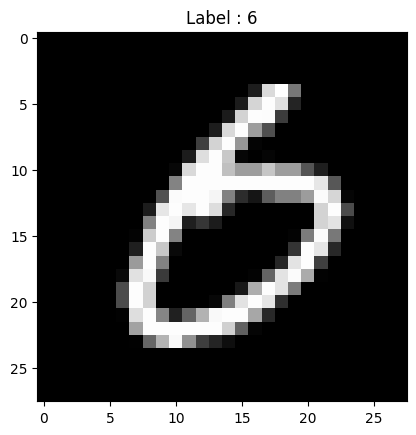

In [ ]:
# 임계값을 설정하고 결과를 출력

threshold = 0.05

if all(z <= threshold for z in z_scores):
    print("선택한 이미지는 0입니다.")
    print(f"실제 이미지의 Label : {label}")
    plt.imshow(selected_image.squeeze(), cmap = 'gray')
    plt.title(f'Label : {label}')
    plt.axis('on')
    plt.show()
else:
    print("선택한 이미지는 0이 아닙니다.")
    print(f"선택한 이미지의 Label : {label}")
    plt.imshow(selected_image.squeeze(), cmap = 'gray')
    plt.title(f'Label : {label}')
    plt.axis('on')
    plt.show()

[0.14888955280184746, 0.16833733767271042, 0.19774910062551498, 0.19281712919473648]
[0.31799449026584625, 0.3384728878736496, 0.36848337948322296, 0.3584730327129364]
[0.08623096431536482, 0.232578431841714, 0.4461415898197792, 0.13981539377067145]
선택한 이미지는 0이 아닙니다.
선택한 이미지의 Label : 7


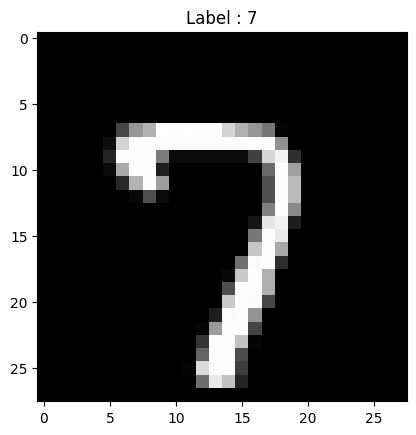

In [ ]:
### 전체 코드

import torch
from torchvision import datasets, transforms
import numpy as np
import random
import matplotlib.pyplot as plt

# MNIST 데이터
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST(root = './data', train = False, download = True, transform = transform)

# 28x28 크기의 이미지를 4개의 14x14 크기의 이미지로 분할하는 과정
def split_image(image):
    image = image.squeeze(0)
    return image.unfold(0, 14, 14).unfold(1, 14, 14).contiguous().view(4, 14, 14)

zero_images = [split_image(train_dataset[i][0]) for i in range(len(train_dataset)) if train_dataset[i][1] == 0]

# 각 사분면의 이미지의 평균과 표준편차를 계산하는 과정
quadrant_stats = []
for quadrants in zip(*zero_images):
    means = [q.mean().item() for q in quadrants]
    stds = [q.std().item() for q in quadrants]
    quadrant_stats.append((means, stds))

# 동일한 사분면에 있는 이미지의 평균과 표준편차를 수집
# 평균의 중앙값과 표준편차의 중앙값을 구하는 과정
quadrant_means = [np.median([stat[0][i] for stat in quadrant_stats]) for i in range(4)]
quadrant_stds = [np.median([stat[1][i] for stat in quadrant_stats]) for i in range(4)]

print(quadrant_means)
print(quadrant_stds)

# 검증 데이터에서 무작위로 하나의 숫자 이미지를 선택하는 과정
random_index = random.randint(0, len(test_dataset) - 1)
selected_image, label = test_dataset[random_index]

# 선택한 숫자 이미지를 동일하게 4개의 14x14 크기의 이미지로 분할
selected_quadrants = split_image(selected_image)

# 이상치 검출을 위한 z-score 계산 과정
def calculate_z_scores(selected_quadrants, quadrant_means, quadrant_stds):
    z_scores = []
    for i in range(4):
        mean = quadrant_means[i]
        std = quadrant_stds[i]
        z_score = (selected_quadrants[i].mean().item() - mean) / std
        z_scores.append(np.abs(z_score)) # 절대값으로 변환
    return z_scores

z_scores = calculate_z_scores(selected_quadrants, quadrant_means, quadrant_stds)

print(z_scores)

# 임계값을 설정하고 결과를 출력
threshold = 0.05

if all(z <= threshold for z in z_scores):
    print("선택한 이미지는 0입니다.")
    print(f"실제 이미지의 Label : {label}")
    plt.imshow(selected_image.squeeze(), cmap = 'gray')
    plt.title(f'Label : {label}')
    plt.axis('on')
    plt.show()
else:
    print("선택한 이미지는 0이 아닙니다.")
    print(f"선택한 이미지의 Label : {label}")
    plt.imshow(selected_image.squeeze(), cmap = 'gray')
    plt.title(f'Label : {label}')
    plt.axis('on')
    plt.show()

# 28x28 크기의 이미지를 16개의 7x7 크기의 이미지로 분할해 진행

means : [0.07366947084665298, 0.1293717622756958, 0.03429371863603592, 0.05366146471351385, 0.20556221157312393, 0.113325335085392, 0.1697879284620285, 0.15198079496622086, 0.057583037763834, 0.027090836316347122, 0.02573029324412346, 0.16802720725536346, 0.02661064639687538, 0.15162065252661705, 0.2152060866355896, 0.10452181100845337]
stds : [0.22895148396492004, 0.3056737780570984, 0.10424837656319141, 0.18345580995082855, 0.36016692221164703, 0.28726062178611755, 0.33571043610572815, 0.328516349196434, 0.19857658445835114, 0.10143330693244934, 0.0952974408864975, 0.34183791279792786, 0.10033025592565536, 0.3014081120491028, 0.3828299194574356, 0.27173635363578796]
z-score : [0.32176891615142633, 0.24493419429817165, 0.08329600093596473, 0.2925034902295908, 0.5707415059407598, 0.7196346572683283, 1.459340757967479, 0.40903215583126445, 0.28997899183783826, 1.9713444792872825, 3.2513354332077777, 0.4915405838985745, 0.26523052444512696, 0.6275732609171552, 0.5621454220208015, 0.38464

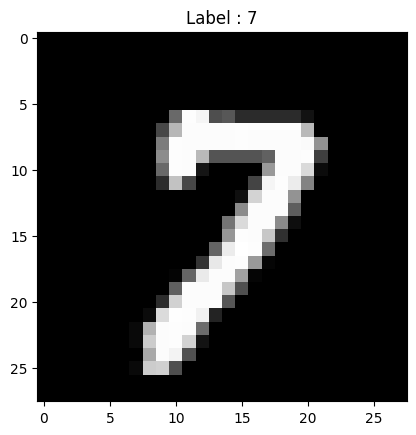

In [ ]:
# 28x28 크기의 이미지를 16개의 7x7 크기의 이미지로 분할하는 과정
def split_image(image):
    image = image.squeeze(0)
    return image.unfold(0, 7, 7).unfold(1, 7, 7).contiguous().view(-1, 7, 7)  # 자동으로 크기를 계산

zero_images = [split_image(train_dataset[i][0]) for i in range(len(train_dataset)) if train_dataset[i][1] == 0]

# 각 이미지의 평균과 표준편차를 계산하는 과정
quadrant_stats = []
for quadrants in zip(*zero_images):
    means = [q.mean().item() for q in quadrants]
    stds = [q.std().item() for q in quadrants]
    quadrant_stats.append((means, stds))

# 동일한 위치에 있는 이미지의 평균과 표준편차를 수집
# 평균의 중앙값과 표준편차의 중앙값을 구하는 과정
quadrant_means = [np.median([stat[0][i] for stat in quadrant_stats]) for i in range(16)]
quadrant_stds = [np.median([stat[1][i] for stat in quadrant_stats]) for i in range(16)]

print(f'means : {quadrant_means}')
print(f'stds : {quadrant_stds}')

# 검증 데이터에서 무작위로 하나의 숫자 이미지를 선택하는 과정
random_index = random.randint(0, len(test_dataset) - 1)
selected_image, label = test_dataset[random_index]

# 선택한 숫자 이미지를 동일하게 16개의 7x7 크기의 이미지로 분할
selected_quadrants = split_image(selected_image)

# 이상치 검출을 위한 z-score 계산 과정
def calculate_z_scores(selected_quadrants, quadrant_means, quadrant_stds):
    z_scores = []
    for i in range(16):
        mean = quadrant_means[i]
        std = quadrant_stds[i]
        z_score = (selected_quadrants[i].mean().item() - mean) / std
        z_scores.append(np.abs(z_score))  # 절대값으로 변환
    return z_scores

z_scores = calculate_z_scores(selected_quadrants, quadrant_means, quadrant_stds)

print(f'z-score : {z_scores}')

# 임계값을 설정하고 결과를 출력
threshold = 0.05

if all(z <= threshold for z in z_scores):
    print("선택한 이미지는 0입니다.")
    print(f"실제 이미지의 Label : {label}")
    plt.imshow(selected_image.squeeze(), cmap='gray')
    plt.title(f'Label : {label}')
    plt.axis('on')
    plt.show()
else:
    print("선택한 이미지는 0이 아닙니다.")
    print(f"선택한 이미지의 Label : {label}")
    plt.imshow(selected_image.squeeze(), cmap='gray')
    plt.title(f'Label : {label}')
    plt.axis('on')
    plt.show()